In [3]:
import pandas as pd

#读取文件
# 查看类型
idCardInfo = pd.read_csv("idcard.csv", encoding="gbk")
print(type(idCardInfo))
print(idCardInfo.dtypes)

<class 'pandas.core.frame.DataFrame'>
name           object
confidence      int64
money         float64
dtype: object


In [7]:
# idCardInfo.head() #  不传参数默认取得前5条
idCardInfo.head(7)   #指定参数，获取前面的数据

,name,confidence,money
0,一百百,77,3333.22
1,一百,56,323.56
2,一二三,20,0.00
3,一一零,48,32348.00
4,一一一,80,22280.00
5,一一八,82,32382.00
6,一一二,30,330.00


In [9]:
# idCardInfo.tail()  #获取后面的数据，不传递参数 则默认5条
idCardInfo.tail(3)  

,name,confidence,money
12,一零一,80,11380.0
13,常天,88,113388.0
14,陆永剑,100,44444100.0


In [10]:
idCardInfo.columns  #获取数据的列

Index(['name', 'confidence', 'money'], dtype='object')

In [11]:
idCardInfo.shape #获取数组的形状

(15, 3)

In [13]:
# idCardInfo.loc[0]  #获取第一行数据

idCardInfo.loc[1]  #获取第二行数据

name              一百
confidence        56
money         323.56
Name: 1, dtype: object

In [14]:
idCardInfo.loc[3:6]  #使用切片  选取下标第3个到第6个 
#（注意这个包含了右边索引的边界值）

,name,confidence,money
3,一一零,48,32348.0
4,一一一,80,22280.0
5,一一八,82,32382.0
6,一一二,30,330.0


In [15]:
idCardInfo["name"] #获取列的元素

0     一百百
1      一百
2     一二三
3     一一零
4     一一一
5     一一八
6     一一二
7     一二一
8     一二二
9     一一二
10    一二四
11    一二四
12    一零一
13     常天
14    陆永剑
Name: name, dtype: object

In [16]:
idCardInfo[['name', 'confidence']] #读取两列值

,name,confidence
0,一百百,77
1,一百,56
2,一二三,20
3,一一零,48
4,一一一,80
5,一一八,82
6,一一二,30
7,一二一,50
8,一二二,44
9,一一二,56


In [18]:
confidence = idCardInfo['confidence']/100
print(confidence)

0     0.77
1     0.56
2     0.20
3     0.48
4     0.80
5     0.82
6     0.30
7     0.50
8     0.44
9     0.56
10    0.78
11    0.99
12    0.80
13    0.88
14    1.00
Name: confidence, dtype: float64


In [19]:
idCardInfo["confidence"].max() #求最大值

idCardInfo["confidence"].min() #求最小值

idCardInfo["confidence"].mean() # 求平均值

65.86666666666666

In [29]:
'''
值排序
'''
idCardInfo.sort_values(["money", "confidence"], inplace = True, ascending = True)
print(idCardInfo)
# help(idCardInfo.sort_values)
# print(idCardInfo)

   name  confidence        money
2   一二三          20         0.00
1    一百          56       323.56
6   一一二          30       330.00
8   一二二          44      1544.00
7   一二一          50      2750.00
9   一一二          56      2856.00
0   一百百          77      3333.22
10  一二四          78      5478.00
12  一零一          80     11380.00
4   一一一          80     22280.00
3   一一零          48     32348.00
5   一一八          82     32382.00
11  一二四          99     54599.00
13   常天          88    113388.00
14  陆永剑         100  44444100.00


In [31]:
idCardInfo1 = pd.read_csv("idcard01.csv", encoding="gbk")
print(idCardInfo1)

   name  confidence        money     sex
0   一百百        77.0      3333.22    male
1    一百        56.0       323.56    male
2   一二三        20.0         0.00  female
3   一一零        48.0     32348.00    male
4   一一一        80.0     22280.00  female
5   一一八        82.0     32382.00  female
6   一一二        30.0       330.00  female
7   一二一        50.0      2750.00  female
8   一二二         NaN      1544.00    male
9   一一二        56.0      2856.00  female
10  一二四        78.0      5478.00    male
11  一二四        99.0     54599.00    male
12  一零一        80.0     11380.00    male
13   常天        88.0    113388.00  female
14  陆永剑       100.0  44444100.00    male


In [32]:
pd.isnull(idCardInfo1["confidence"])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
Name: confidence, dtype: bool

In [33]:
#去掉空值 NAN
conf_is_null = pd.isnull(idCardInfo1["confidence"])
idCardInfo1["confidence"][conf_is_null == False]

0      77.0
1      56.0
2      20.0
3      48.0
4      80.0
5      82.0
6      30.0
7      50.0
9      56.0
10     78.0
11     99.0
12     80.0
13     88.0
14    100.0
Name: confidence, dtype: float64

In [47]:
import numpy as np
#分组的概念

idCardInfo1.pivot_table(index="sex", values="money", aggfunc = np.sum)
# help(idCardInfo1.pivot_table)
# print(idCardInfo1)
# help(idCardInfo1.pivot)
# idCardInfo1.pivot(index="sex", values="money")

,money
sex,
female,173986.00
male,44553105.78


  name  confidence    money
2  一二三          20      0.0
6  一一二          30    330.0
8  一二二          44   1544.0
3  一一零          48  32348.0
7  一二一          50   2750.0


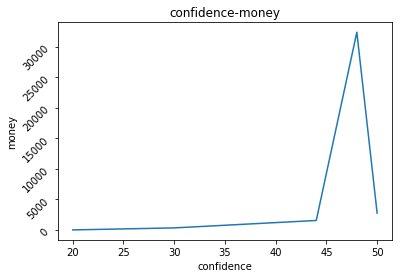

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline  

# plt.plot()
# plt.show()
d = idCardInfo.sort_values("confidence", ascending=True).head()
print(d)
plt.xlabel("confidence")
plt.yticks(rotation=45)
plt.ylabel("money")
plt.title("confidence-money")
plt.plot(d["confidence"], d["money"])
plt.show()

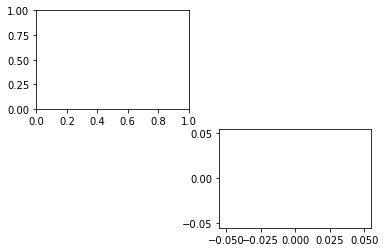

In [67]:
#matplotlib画多图

fig = plt.figure()
fig1 = fig.add_subplot(2,2,1)
fig2 = fig.add_subplot(2,2,4)
plt.plot()
plt.show()

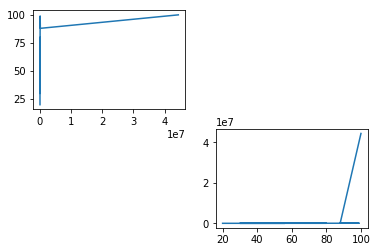

In [68]:
fig = plt.figure()
fig1 = fig.add_subplot(2,2,1)
fig2 = fig.add_subplot(2,2,4)
fig1.plot(idCardInfo["money"], idCardInfo["confidence"])
fig2.plot(idCardInfo["confidence"], idCardInfo["money"])
plt.show()

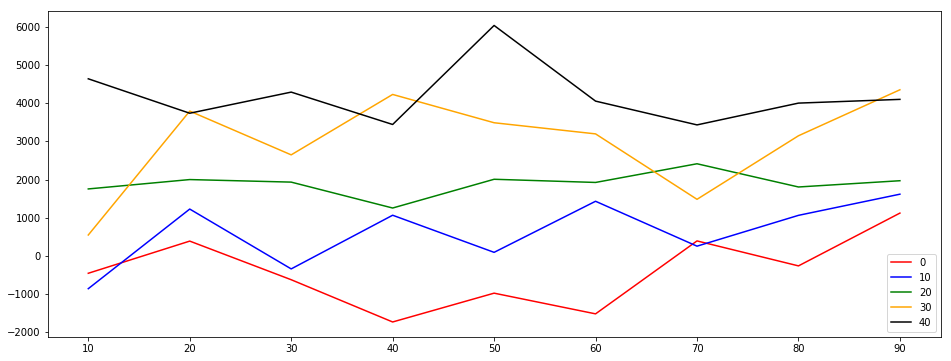

In [70]:
import numpy as np

# figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True)

# num:图像编号或名称，数字为编号 ，字符串为名称
# figsize:指定figure的宽和高，单位为英寸；
# dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80
# facecolor:背景颜色
# edgecolor:边框颜色
# frameon:是否显示边框

fig = plt.figure(figsize=(16,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
h = np.arange(10, 100, 10)
for i in range(5):
    v = 1000*i + np.random.randn(9,1)*1000
    label = str(i*10)
    plt.plot(h, v, c = colors[i], label=label)
plt.legend(loc='best') #显示折线图标签，即右下角的小图
plt.show()

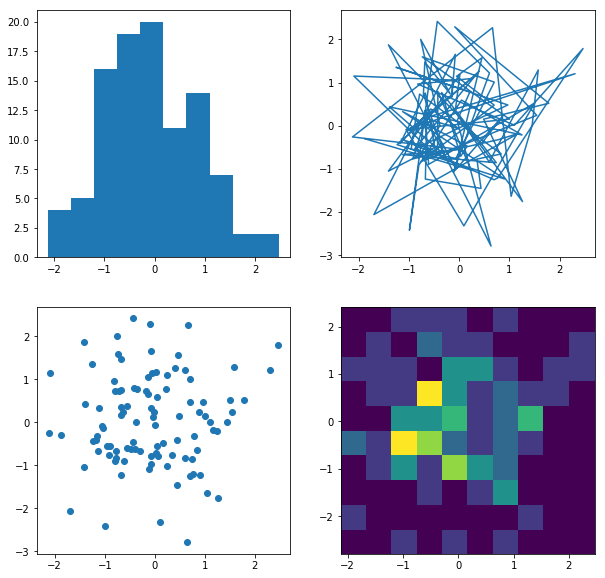

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(data[0]) #直方图
axs[1, 0].scatter(data[0], data[1]) #散点图 
axs[0, 1].plot(data[0], data[1]) #折线图
axs[1, 1].hist2d(data[0], data[1]) #二维矩阵图
plt.show()

In [6]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    If positive, int_like or int-convertible arguments are provided,
    `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1 (if any of the :math:`d_i` are
    floats, they are first converted to integers by truncation). A single
    float randomly sampled from the distribution is returned if no
    argument is provided.
    
    This is a convenience function.  If you want an interface that takes a
    tuple as the first argument, use `numpy.random.standard_normal` instead.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should be all positive.
        If no argument is given a single Python float is ret

In [11]:
np.random.randn(2, 100)

array([[ 0.40571036,  0.58503694, -1.22976886, -1.38297529, -0.9919369 ,
        -0.16604328,  0.05251332,  0.23940117, -0.67411223,  0.42747062,
        -0.69501274,  0.51655433,  1.32922346,  0.84864027,  1.01362389,
        -2.95929714, -0.97537267,  2.2535769 ,  0.68414752, -1.6838196 ,
         0.64409875,  0.51298041, -1.53348651, -0.82212075, -0.58524245,
        -1.388804  , -0.06148019,  1.12462715, -0.75909058,  0.27001531,
        -0.52593681,  1.37965849,  1.56354933,  1.93608337,  1.33009326,
        -2.17741735, -1.02010158,  0.2419793 , -0.11331823, -1.90789453,
        -0.19239881, -1.16273621, -2.46544764,  1.17395248,  0.93688992,
        -0.22420562,  1.17310336, -1.52368716, -0.12221179, -0.65658044,
        -1.30600181, -1.21381479, -0.35762435,  1.76156935, -2.36291211,
         0.05293465, -1.13219397,  0.5452069 , -1.91808354,  0.47177707,
        -0.5882702 ,  1.15415352, -0.41831633,  0.66069179,  0.41126261,
         2.14259632, -1.48473912,  1.69431934, -0.6